# Projet Expérimental - Sphère de fluide autogravitante
    POINTEAU Simon
    VERNEY Arthur
    

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def beautify(axe, legend=False):
    apply = lambda axe: [[[[function[position].set(**parameter) for position in lines] for lines, parameter in zip([["top", "right"], ["left", "bottom"]], [{"visible":False}, {"color":'#888888'}])] if i == 1 else function(**args)] for (i, function), args in zip(enumerate([axe.grid, axe.spines, axe.legend] if legend else [axe.grid, axe.spines]), [{"visible":True, "alpha":0.72}, None, {"frameon":True}])]
    [[apply(a) for a in axe] if isinstance(axe, np.ndarray) and axe.shape[0] == axe.size else ([[apply(a) for a in axe2] for axe2 in axe] if isinstance(axe, np.ndarray) and axe.shape[0] != axe.size else apply(axe))]


## Connaissances

L'accélération gravitationnelle (pesanteur) déduite du potentiel gravitationnel $\phi$ s'écrit :
$$\vec{g} = -\overrightarrow{\nabla}\phi.$$

Où l'équation de Poisson affirme que :
$$\Delta \phi = -4\pi\rho G,$$

et donc 
$$\text{div}(\vec{g}) = \Delta \phi.$$

## Équation de Lane-Emden

L'équation de l'équilibre hydrostatique est donnée par :
$$\overrightarrow{\nabla}P = \rho \vec{g}.$$

La pression étant une fonction de la masse volumique, le gradient de pression peut s'écrire :
$$\overrightarrow{\nabla}P = \frac{dP}{d\rho} \overrightarrow{\nabla} \rho.$$

À l'aide de l'équilibre hydrostatique il est ainsi possible d'exprimer la pesanteur en fonction de la densité :
$$\vec{g} = \frac{1}{\rho}\frac{dP}{d\rho} \overrightarrow{\nabla} \rho.$$

L'objectif de cette démarche est de conduire à une équation permettant d'exprimer la densité de la sphère autogravitante. D'après l'équation de Poisson définie précédemment, cela donne:
$$\text{div}(\vec{g}) = \overrightarrow{\nabla}\cdot\left(\frac{1}{\rho}\frac{dP}{d\rho} \overrightarrow{\nabla} \rho\right) = \frac{1}{\rho}\frac{dP}{d\rho}\Delta\rho + \overrightarrow{\nabla}\rho\cdot\overrightarrow{\nabla}\left(\frac{1}{\rho}\frac{dP}{d\rho}\right) = -4\pi\rho G$$

Conduisant alors à
$$\Delta\rho + \overrightarrow{\nabla}\rho\cdot\overrightarrow{\nabla}\left(\frac{1}{\rho}\frac{dP}{d\rho}\right)\frac{1}{\frac{1}{\rho}\frac{dP}{d\rho}} = \frac{-4\pi G\rho}{\frac{1}{\rho}\frac{dP}{d\rho}}.$$

Or d'après l'équation d'état polytropique :
$$\frac{1}{\rho}\frac{dP}{d\rho} \propto \rho^{\gamma - 2}.$$

Cela conduit alors à l'équation de Lane-Emden généralisée :
$$\frac{\Delta\rho}{\rho} + (\gamma -2)\left(\frac{\overrightarrow{\nabla}\rho}{\rho}\right)^2 + \frac{4\pi G\rho}{\frac{1}{\rho}\frac{dP}{d\rho}} = 0.$$

En admettant que la masse volumique peut s'écrire en fonction du rayon : $\rho(r)$
$$\rho = \rho_c\theta^n \qquad \Longrightarrow \qquad \theta^n = \frac{\rho}{\rho_c},$$

un changement de variable pour obtenir la longueur d'échelle est obtenu par :
$$\xi = r\sqrt{\frac{4\pi G {\rho_c}^2}{(n+1)P_c}}.$$

Permettant de transformer l'équation différentielle en une forme plus élégante :
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right) + \theta^n = \frac{d^2\theta}{d\xi^2} + \frac{2}{\xi}\frac{d\theta}{d\xi} + \theta^n = 0$$

## Résolution numérique de l'équation

Par changement de variable,
$$
\frac{d}{d\xi}
\begin{cases}
    \theta = \omega(\xi)\\
    \omega = -\frac{2}{\xi}\omega(\xi) - \theta^n
\end{cases}
$$

La force gravitationnelle est donnée par
$$\overrightarrow{F}_g = m\vec{g} = G\;\frac{mM}{r^2}\;\vec{e}_r$$

Afin de déterminer la variation de volume/surface de l'astre on donne :
$$\partial_r V = \partial_r\left(\frac{M}{\rho}\right) = M \:\partial_r \rho^{-1}$$

On cherche alors à déterminer l'expression de la densité :
$$\rho = \frac{1}{4\pi G} \; \text{div}(\vec{g})$$

On peut déterminer la pression $P$ :

$$P = \int_r \rho g_r \;dr = \frac{-1}{4\pi G}\int_r \text{div}(\vec{g}).\,g_r \;dr$$

Fin de séance - objectifs prochains :
- tirer des informations du document trouvé sur la modélisation 3D du soleil
- obtenir des profils de température avec la diffusion de l'énergie
- implémenter les équations (notamment diffusion de chaleur)
- créer un premier modèle de disque

In [2]:
class MethodNum:
    def __init__(self, x, dt) -> None:
        self.x = x
        self.Ts = dt

    def _set_initial_type(self, initial_condition):

        """
        Forces the initial condition type as np.ndarray.

        Parameter :
        -----------
        initial_condition : int, float, list, tuple, ndarray

        Return :
        -----------
        init : ndarray

        """
    
        if not isinstance(initial_condition, np.ndarray):

            if isinstance(initial_condition, list):
                init = np.array(initial_condition)
            else:
                init = np.array([initial_condition])
        else:
            init = initial_condition
        
        return init
    
    def init_compute(self, y0, stop_point):

        # number of points in the time axis
        self.N = self.x.size

        # set the initial condition as np.ndarray
        y0 = self._set_initial_type(initial_condition=y0)

        # get the spatial dimension of the problem, for example : 2D with (x0, y0) --> order = 2
        order = y0.shape[0]

        # set the stopping parameter of the computation loop
        loop = self.N-1 if stop_point is None else (stop_point - 1 if stop_point <= self.N - 1 else print(f"Expected size is out of bounds for index {self.x.size}"))

        # initial axis for the estimated solution
        y = np.zeros((order, self.N)) if stop_point is None else np.zeros((order, loop + 1))

        # applying the initial conditions
        y[:, 0] = y0

        return y, y0, loop, order

class RungeKutta(MethodNum):
    
    def __init__(self, x, dt, order):
        super().__init__(x, dt)
        self.q = order
        
        if order == 4:
            self.A = np.roll(np.diag([0, 1/2, 1/2, 1]), -1)
            self.B = np.array([1/6, 1/3, 1/3, 1/6])
            self.C = np.array([0, 1/2, 1/2, 1])

    # RK4 scheme solution from TP corrections
    def rk2D(self, EDO, y0, nb_point=None):

        y, y0, loop, _ = self.init_compute(y0=y0, stop_point=nb_point)

        x = np.copy(self.x)
        
        for i in range(loop):
            K1 = EDO(x_axis=x[i]     ,  ydy=y[:,i])
            K2 = EDO(t=x[i]+self.Ts/2,  ydy=y[:,i]+self.Ts/2*K1)
            K3 = EDO(t=x[i]+self.Ts/2,  ydy=y[:,i]+self.Ts/2*K2)
            K4 = EDO(t=x[i]+self.Ts  ,  ydy=y[:,i]+self.Ts*K3)
            y[:,i+1] = y[:,i] + self.Ts/6*(K1 + 2*K2 + 2*K3 + K4)
            x[i+1] = x[i] + self.Ts

        return y
            
    # General scheme for RK order q
    def compute(self, EDO, y0, excitation=False, nb_point=None):
        
        y_rk, y0, loop, order = self.init_compute(y0=y0, stop_point=nb_point)
        
        for xi, xn in zip(range(loop), self.x):
            
            K = np.zeros((order, self.q+1))

            for i in range(1, self.q+1):
                
                K[:, i] = EDO(
                    ydy = y_rk[:, xi] + self.Ts * (self.A[i-1, i-2] * K[:, i-1]),
                    x_axis  = xn + self.C[i-1] * self.Ts
                    )

            K = [np.delete(arr=K, obj=0) if K.size == K.shape[0] else np.delete(arr=K, obj=0, axis=1)][0]

            y_rk[:, xi+1] = y_rk[:, xi] + self.Ts * np.sum(self.B * K, axis=1)
        
        return y_rk

In [3]:
def lane_emdem(ydy, x_axis):
    '''
    Parameters :
    ------------
    ydy : array of both order 1 equations
    x_axis : xi
    '''

    [y0, dy0] = ydy
    
    dy = np.array(
        [
            dy0,
            (-2/x_axis) * dy0 - y0**n
        ]
    )
    
    return dy

In [4]:
n = 1.5
# n = 1.385

# diamètre du soleil
d = 1.3927e9
R = d / 2

# spatial step : 500km
dR = 50e3

radius = np.arange(1e-15, R, dR)

# changement de variable
rho_center = 150e3   # densité au coeur du soleil
G = 6.674e-11        # constante gravitationnelle
P_center = 2.850e14  # pression au coeur du soleil
Tc = 15e6            # température au coeur du soleil

alpha = np.sqrt( (4 * np.pi * G * rho_center ** 2) / ((n + 1) * P_center))
xi, dxi = radius * alpha, dR * alpha

In [5]:
rungekutta = RungeKutta(x=xi, dt=dxi, order=4)
[theta, dtheta] = rungekutta.compute(EDO=lane_emdem, y0=np.array([1, 0]))

xi = xi[theta==theta]
radius = radius[theta==theta]
dtheta = dtheta[theta==theta]
theta = theta[theta==theta]


<ipython-input-3-88c3721beaae>:14: RuntimeWarning: invalid value encountered in double_scalars
  (-2/x_axis) * dy0 - y0**n


In [22]:
theta

array([ 1.00000000e+00,  9.99965298e-01,  9.99940879e-01,  9.99887288e-01,
        9.99808475e-01,  9.99705683e-01,  9.99579342e-01,  9.99429644e-01,
        9.99256691e-01,  9.99060543e-01,  9.98841243e-01,  9.98598823e-01,
        9.98333310e-01,  9.98044727e-01,  9.97733099e-01,  9.97398449e-01,
        9.97040797e-01,  9.96660170e-01,  9.96256589e-01,  9.95830080e-01,
        9.95380669e-01,  9.94908383e-01,  9.94413251e-01,  9.93895300e-01,
        9.93354561e-01,  9.92791067e-01,  9.92204850e-01,  9.91595943e-01,
        9.90964383e-01,  9.90310205e-01,  9.89633448e-01,  9.88934150e-01,
        9.88212352e-01,  9.87468095e-01,  9.86701422e-01,  9.85912377e-01,
        9.85101004e-01,  9.84267352e-01,  9.83411466e-01,  9.82533397e-01,
        9.81633195e-01,  9.80710910e-01,  9.79766595e-01,  9.78800305e-01,
        9.77812095e-01,  9.76802019e-01,  9.75770137e-01,  9.74716507e-01,
        9.73641189e-01,  9.72544243e-01,  9.71425732e-01,  9.70285719e-01,
        9.69124270e-01,  

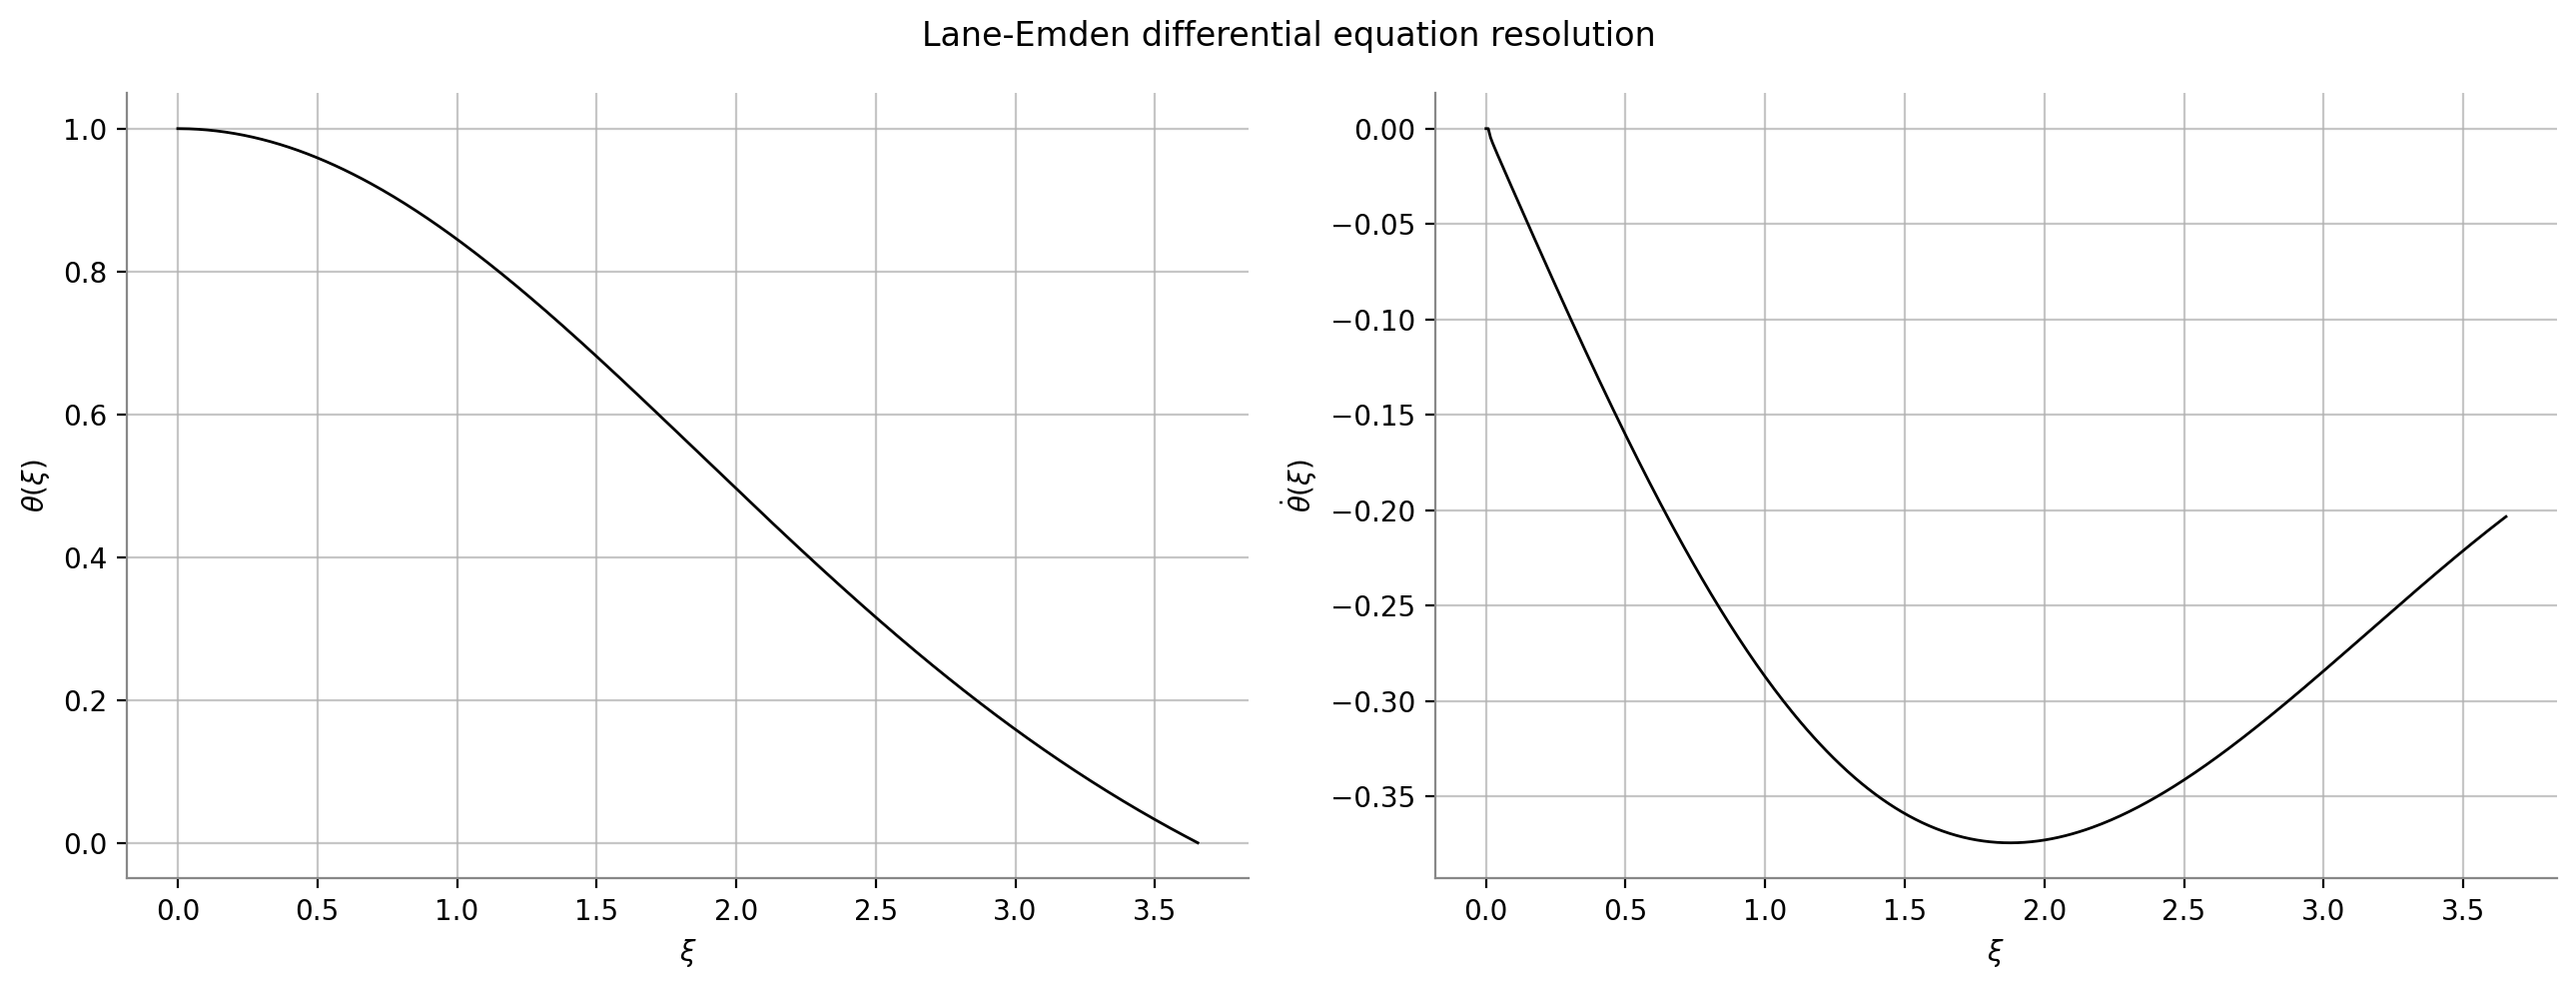

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), tight_layout=True, dpi=200)
fig.suptitle("Lane-Emden differential equation resolution")
ax[0].plot(xi, theta, color="black", linewidth=1.)
ax[0].set(ylabel=r"$\theta(\xi)$")
ax[1].plot(xi, dtheta, color="black", linewidth=1.)
ax[1].set(ylabel=r"$\dot{\theta}(\xi)$")
for a in ax:
    a.set(xlabel=r"$\xi$")
beautify(ax)
plt.show()

### Équation d'état d'un fluide polytropique (à démontrer grâce aux photos)
donnée par la relation :

$$P = \kappa \rho^\gamma.$$

En considérant la condition initiale, pour la source située au centre de la sphère :

$$P_c = \kappa {\rho_c}^\gamma \qquad \Longrightarrow \qquad \kappa = \frac{P_c}{{\rho_c}^\gamma}$$

et donc 

$$P = P_c \left(\frac{\rho}{\rho_c}\right)^\gamma$$

avec $\gamma$ l'indice adiabatique et $n$ l'indice polytropique :
$$\gamma = 1 + \frac{1}{n}$$

In [20]:
rho = rho_center * theta ** n
gamma = 1 + 1 / n
    
pressure = P_center * (rho/rho_center) ** gamma

<ipython-input-20-0f4d905dde70>:1: RuntimeWarning: invalid value encountered in power
  rho = rho_center * theta ** n


In [21]:
pressure

array([2.85000000e+14, 2.84976413e+14, 2.84959816e+14, 2.84923393e+14,
       2.84869833e+14, 2.84799986e+14, 2.84714151e+14, 2.84612468e+14,
       2.84495014e+14, 2.84361843e+14, 2.84212996e+14, 2.84048509e+14,
       2.83868416e+14, 2.83672751e+14, 2.83461549e+14, 2.83234845e+14,
       2.82992676e+14, 2.82735082e+14, 2.82462103e+14, 2.82173782e+14,
       2.81870164e+14, 2.81551296e+14, 2.81217228e+14, 2.80868011e+14,
       2.80503699e+14, 2.80124348e+14, 2.79730015e+14, 2.79320762e+14,
       2.78896650e+14, 2.78457745e+14, 2.78004113e+14, 2.77535823e+14,
       2.77052946e+14, 2.76555556e+14, 2.76043728e+14, 2.75517538e+14,
       2.74977068e+14, 2.74422398e+14, 2.73853612e+14, 2.73270796e+14,
       2.72674037e+14, 2.72063425e+14, 2.71439051e+14, 2.70801010e+14,
       2.70149396e+14, 2.69484306e+14, 2.68805841e+14, 2.68114101e+14,
       2.67409189e+14, 2.66691210e+14, 2.65960269e+14, 2.65216476e+14,
       2.64459940e+14, 2.63690773e+14, 2.62909088e+14, 2.62115001e+14,
      

In [8]:
gamma

1.6666666666666665

In [9]:
def temperature(density, rho_c, temp_c, gamma):
    print()
    return temp_c * (density / rho_c) ** (gamma - 1)

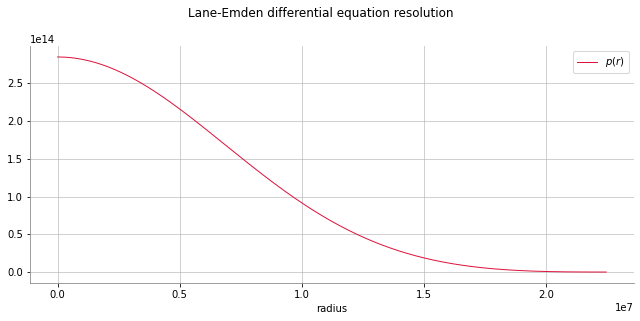

In [10]:
fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)
fig.suptitle("Lane-Emden differential equation resolution")
ax.plot(radius, pressure, color="crimson", linewidth=1., label=r"$p(r)$")
#ax.plot(radius, rho, color="black", linewidth=1., label=r"$\rho(r)$")
ax.set(xlabel=r"radius")
beautify(ax, legend=True)
plt.show()

In [11]:
# Constantes et données

u=931.494 # unité de masse atomique
k=1.38064852*(10**-23) # constante de Boltzmann

# sections efficaces de fusion
sigma=np.zeros(5)
sigma[0]=10**-31
sigma[1]=10**-32
sigma[2]=10**-32
sigma[3]=10**-33
sigma[4]=10**-35

# Masse des particules en MeV.c-2
masse=np.zeros(5)
masse[0]=1.00782503190*u # H
masse[1]=2.01410177784*u # D
masse[2]=3.01604928132*u # T
masse[3]=3.01602932197*u # He3
masse[4]=4.002602*u # He4

# Z des particules en MeV.c-2
Z=np.zeros(5)
Z[0]=1 # H
Z[1]=2 # D
Z[2]=3 # T
Z[3]=3 # He3
Z[4]=4 # He4

def mevc2tokg (MeVc2):
  return 1.79*(10**-30)*MeVc2

def T_Van_der_Waals(P,compo,rho):

  # P(V-nb)=RT

  # 75% H 25% D
  nH=compo[0]*rho/mevc2tokg(masse[0])
  nD=compo[1]*rho/mevc2tokg(masse[1])

  # Nombre de molécules
  N = nH + nD
  print(N)
  b = (4/3)*np.pi*(2.5*(10**-11))**3

  # Nombre d'Avogadro
  Na = 6.022140e23

  # Constante de Boltzmann
  kb = 1.380649e-23
  
  # Constante de gaz parfait
  R = Na * kb

  Tc = 1.2
  Pc = 13.95

  a=27*R*R*Tc*Tc/(64*Pc)
  ap=a/(Na*Na)

  b = 0
  ap = 0
  T = (P+N*N*ap)*(1-N*b)/(kb*N)
  return T

In [12]:
# T = T_Van_der_Waals(P=pressure, compo=[0.75, 0.25], rho=rho)
T = temperature(density=rho, rho_c=rho_center, temp_c=Tc, gamma=gamma)

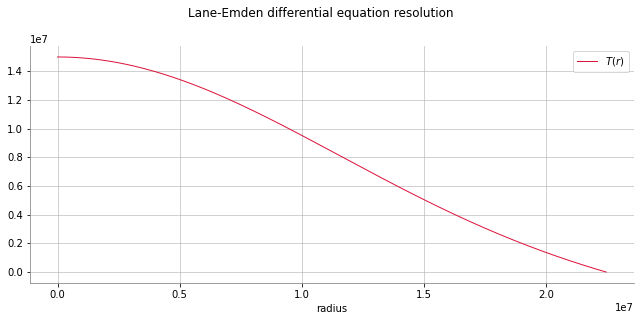

25542.20403775087

In [13]:
fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)
fig.suptitle("Lane-Emden differential equation resolution")
ax.plot(radius, T, color="crimson", linewidth=1., label=r"$T(r)$")
# ax.plot(radius[radius>2.1e7], T[radius>2.1e7], color="crimson", linewidth=1., label=r"$T(r)$")
ax.set(xlabel=r"radius")
beautify(ax, legend=True)
plt.show()

T[-2]

In [14]:
T[-1]

669.7506931911573

In [15]:
def Prayonné(T,R):
  """
  T en Kelvin et S la surface de la sphère en m2
  retourne la puissance rayonné
  """
  S = 4*np.pi*R**2
  sig=5.67*(10**-8) # constante de Stefan-Boltzmann en W
  P=sig*(T**4)*S
  return P, P/S

In [16]:
power, power_m2 = Prayonné(T=T[-2], R=R)
power, power_m2

(1.470555981874264e+29, 24133290364.147255)

In [24]:
T_num = np.array([])
n_array = np.linspace(1.2, 3, 15)

for n in n_array:
    # n = 1.385

    # diamètre du soleil
    d = 1.3927e9
    R = d / 2

    # spatial step : 500km
    dR = 50e3

    radius = np.arange(1e-15, R, dR)

    # changement de variable
    rho_center = 150e3   # densité au coeur du soleil
    G = 6.674e-11        # constante gravitationnelle
    P_center = 2.850e14  # pression au coeur du soleil
    Tc = 15e6            # température au coeur du soleil

    alpha = np.sqrt( (4 * np.pi * G * rho_center ** 2) / ((n + 1) * P_center))
    xi, dxi = radius * alpha, dR * alpha


    rungekutta = RungeKutta(x=xi, dt=dxi, order=4)
    [theta, dtheta] = rungekutta.compute(EDO=lane_emdem, y0=np.array([1, 0]))

    xi = xi[theta==theta]
    radius = radius[theta==theta]
    dtheta = dtheta[theta==theta]
    theta = theta[theta==theta]

    rho = rho_center * theta ** n
    gamma = 1 + 1 / n
    print(n)

    pressure = P_center * (rho/rho_center) ** gamma

    T = temperature(density=rho, rho_c=rho_center, temp_c=Tc, gamma=gamma)
    T_num = np.append(T_num, T[-1])

<ipython-input-3-88c3721beaae>:14: RuntimeWarning: invalid value encountered in double_scalars
  (-2/x_axis) * dy0 - y0**n
<ipython-input-24-6b1c013db73e>:34: RuntimeWarning: invalid value encountered in power
  rho = rho_center * theta ** n


1.2

1.3285714285714285

1.457142857142857

1.5857142857142859

1.7142857142857144

1.842857142857143

1.9714285714285715

2.1

2.2285714285714286

2.357142857142857

2.4857142857142858

2.6142857142857143

2.742857142857143

2.871428571428572

3.0



<ipython-input-24-6b1c013db73e>:38: RuntimeWarning: invalid value encountered in power
  pressure = P_center * (rho/rho_center) ** gamma
<ipython-input-9-6b90ac7f785e>:3: RuntimeWarning: invalid value encountered in power
  return temp_c * (density / rho_c) ** (gamma - 1)


In [26]:
print(T_num)

[            nan             nan   1588.46736154             nan
             nan   4865.33842941             nan   1241.05157994
   2569.07405906             nan    888.61240848             nan
   1852.02977022             nan 265991.07910496]


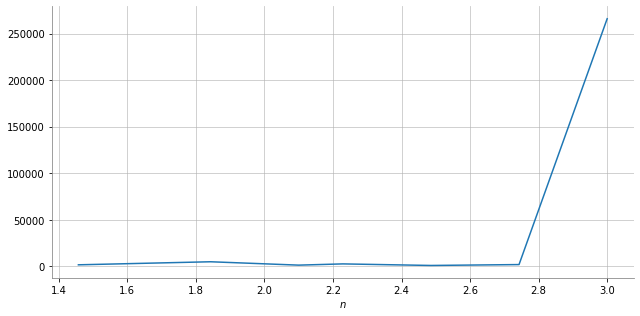

In [27]:
fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)
ax.plot(n_array[T_num==T_num], T_num[T_num==T_num])
ax.set(xlabel="$n$")
beautify(axe=ax)
plt.show()

In [31]:
indice = np.argmin(np.abs(T_num[T_num==T_num] - 6000))
T_num[T_num==T_num][indice]

4865.3384294062525

In [36]:
n_array[T_num==T_num][indice]

1.842857142857143

In [39]:
gamma_opt = 1 + 1/n_array[T_num==T_num][indice]
gamma_opt

1.5426356589147288